In [73]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from PIL import Image

In [74]:
# np.save('img/lenna.npy', np.asarray(Image.open('img/lenna.jpg').convert('L')) / 255)

In [75]:
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 200

In [76]:
def get_bounds(img_size, d):
    center = img_size // 2
    return [center - d, center + d]

get_bounds(512, 25)

[231, 281]

Spectrum of noisy goose image:


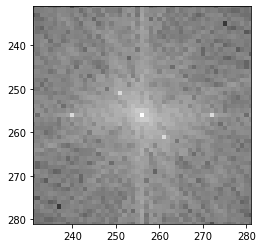

Spectrum of filtered noisy goose image:


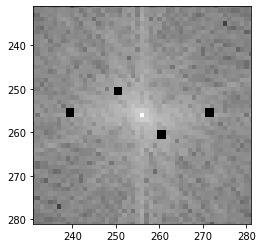

Reconstructed image:


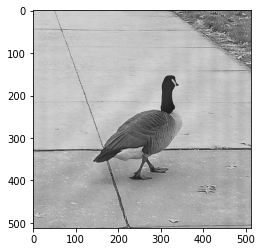

In [115]:
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
import numpy as np

urllib.request.urlretrieve(
    'https://i.stack.imgur.com/3Whv7.png',
    "noisy_goose.png"
)

goose_filtered = np.asarray(Image.open('noisy_goose.png').convert('L')) / 255

spec_goose_filtered = np.fft.fftshift(np.fft.fft2(goose_filtered))

plt.xlim([231, 281])
plt.ylim([281, 231])
print("Spectrum of noisy goose image:")
plt.imshow(np.log(abs(spec_goose_filtered) + .01), plt.get_cmap('gray'))
plt.show()

def blank(M, y, x):
    M[x-1:x+1, y-1:y+1] = 0

# eyeball the coordinates of poles by looking at the spectrum and blank them
blank(spec_goose_filtered, 240, 256)
blank(spec_goose_filtered, 272, 256)
blank(spec_goose_filtered, 251, 251)
blank(spec_goose_filtered, 261, 261)

plt.xlim([231, 281])
plt.ylim([281, 231])
print("Spectrum of filtered noisy goose image:")
plt.imshow(np.log(abs(spec_goose_filtered) + .01), plt.get_cmap('gray'))
plt.show()
goose_filtered = np.fft.ifft2(np.fft.ifftshift(spec_goose_filtered)).real

print("Reconstructed image:")
plt.imshow(goose_filtered, plt.get_cmap('gray'))
plt.show()
